In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
import seaborn as sn

In [3]:

calories=pd.read_csv("calories.csv")
excercise=pd.read_csv("exercise.csv")

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
excercise_df=excercise.merge(calories,on="User_ID")
excercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
print("Dataset has",excercise_df.shape[0],"instances and",excercise_df.shape[1],"colums")

Dataset has 15000 instances and 9 colums


In [10]:
excercise_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [9]:
print("Colums:")
for i,column in zip(range(len(excercise_df.columns)),excercise_df.columns):
    print("\t",i+1,".",column)

Colums:
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [11]:
excercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


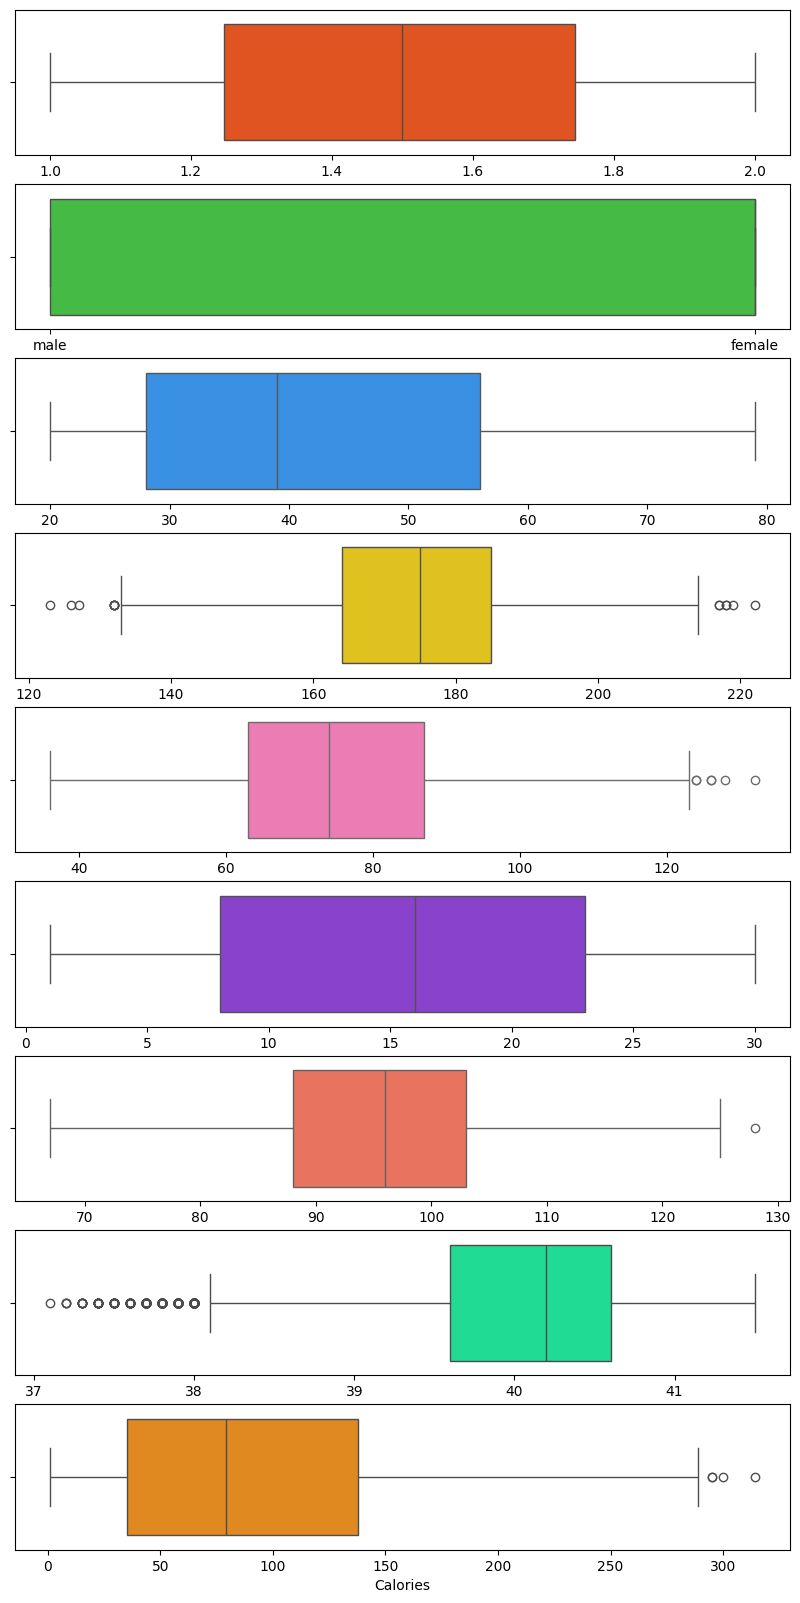

In [12]:


import matplotlib.pyplot as plt 
%matplotlib inline
c = ['#FF4500', '#32CD32', '#1E90FF', '#FFD700', '#FF69B4', '#8A2BE2', '#FF6347', '#00FA9A', '#FF8C00']
fig1,axes=plt.subplots(len(excercise_df.columns),1,figsize=(10,20))
axes = axes.flatten()
for i,column in zip(range(len(excercise_df.columns)),excercise_df.columns):
    try:
        sn.boxplot(data=excercise_df,x=column,color=c[i],ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue



In [13]:
excercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

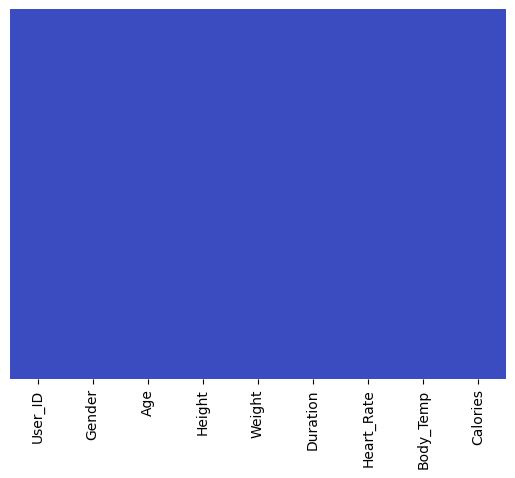

In [14]:
sn.heatmap(excercise_df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [15]:
print("The shape of dataset before dropping :",excercise_df.shape)
excercise_df.drop_duplicates(subset=["User_ID"],keep='last',inplace=True)
print("The shape of dataset after dropping :",excercise_df.shape)

The shape of dataset before dropping : (15000, 9)
The shape of dataset after dropping : (15000, 9)


In [16]:
excercise_df.drop(columns="User_ID",inplace=True)

For avoiding Data Leakage in our model,spilt data into training set and test befoe doing any feature engineering

In [17]:
exercise_train_data,exercise_test_data=train_test_split(excercise_df,test_size=0.2,random_state=1)
print("Shae of training data: ",exercise_train_data.shape)
print("Shape of test data: ",exercise_test_data.shape)

Shae of training data:  (12000, 8)
Shape of test data:  (3000, 8)


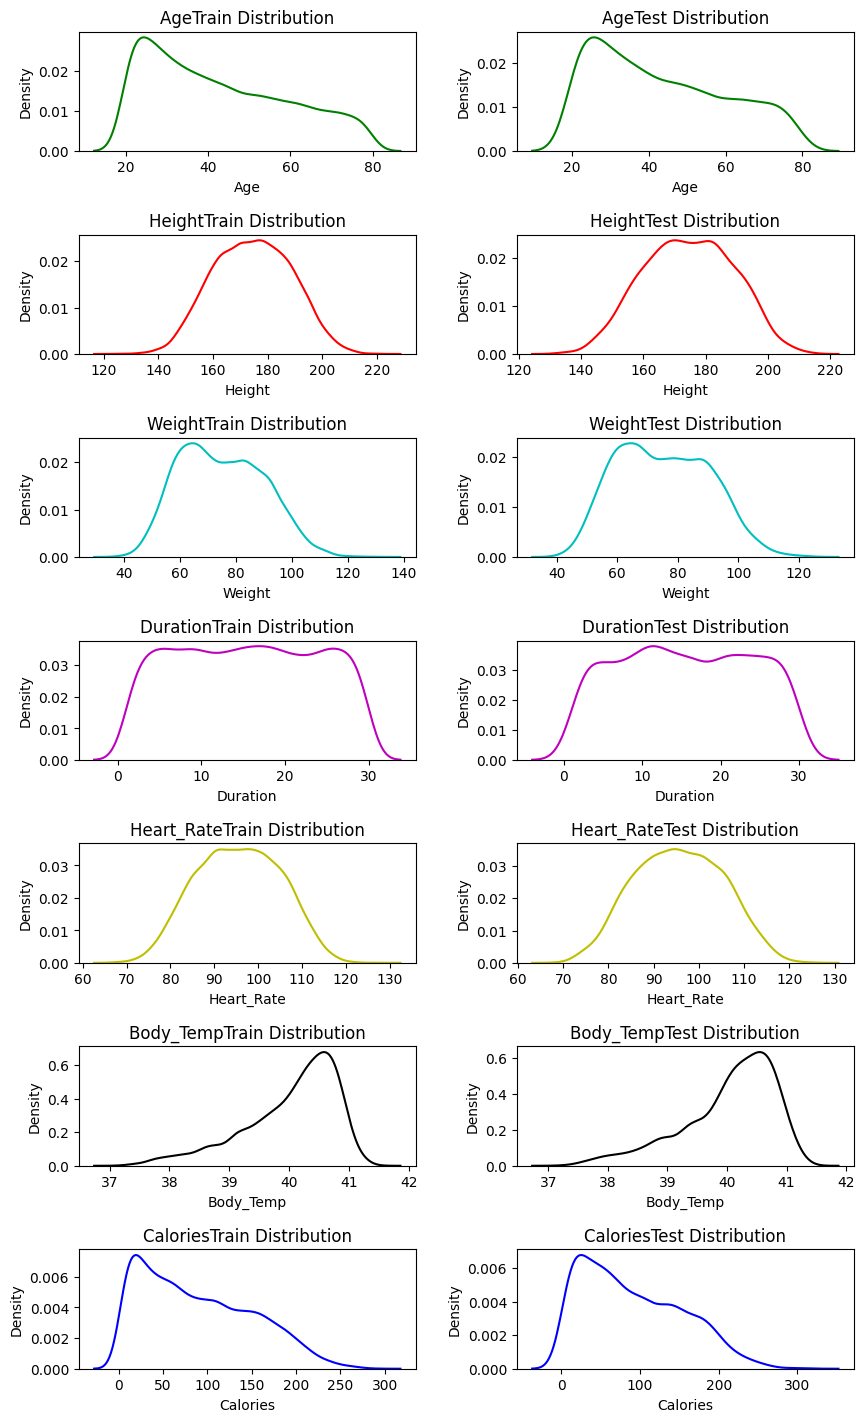

In [18]:
c=['b','g','r','c','m','y','k','b']
fig1,axes=plt.subplots(len(exercise_train_data.columns),2,figsize=(10,20))
plt.subplots_adjust(wspace=0.3,hspace=0.7)
axes=axes.flatten()

for i,column,color in zip(range(0,len(exercise_train_data.columns)*2,2),exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column+"Train Distribution")
        sn.kdeplot(data=exercise_train_data,x=column,ax=axes[i],color=color)
    except:
        fig1.delaxes(axes[i])
        continue

for i,column,color in zip(range(1,len(exercise_train_data.columns)*2,2),exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column+"Test Distribution")
        sn.kdeplot(data=exercise_test_data,x=column,ax=axes[i],color=color)
    except:
        fig1.delaxes(axes[i])
        continue
plt.show()


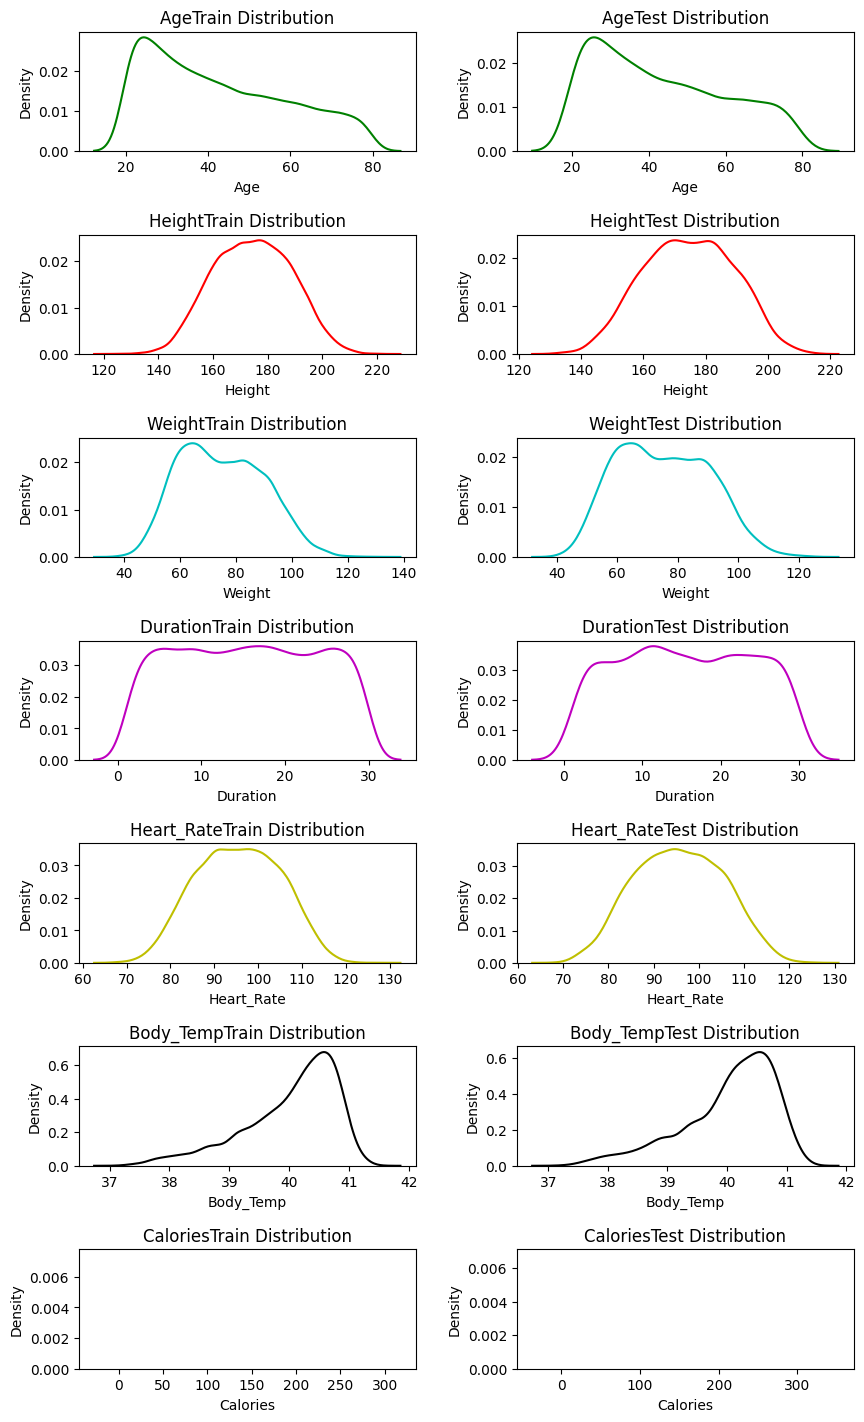

In [19]:
c=['b','g','r','c','m','y','k','w','b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns),2,figsize=(10,20))
plt.subplots_adjust(wspace=0.3,hspace=0.7)
axes=axes.flatten()

for i,column,color in zip(range(0,len(exercise_train_data.columns)*2,2),exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column+"Train Distribution")
        sn.kdeplot(data=exercise_train_data,x=column,ax=axes[i],color=color)
    except:
        fig1.delaxes(axes[i])
        continue

for i,column,color in zip(range(1,len(exercise_train_data.columns)*2,2),exercise_train_data.columns,c):
    try:
        axes[i].title.set_text(column+"Test Distribution")
        sn.kdeplot(data=exercise_test_data,x=column,ax=axes[i],color=color)
    except:
        fig1.delaxes(axes[i])
        continue

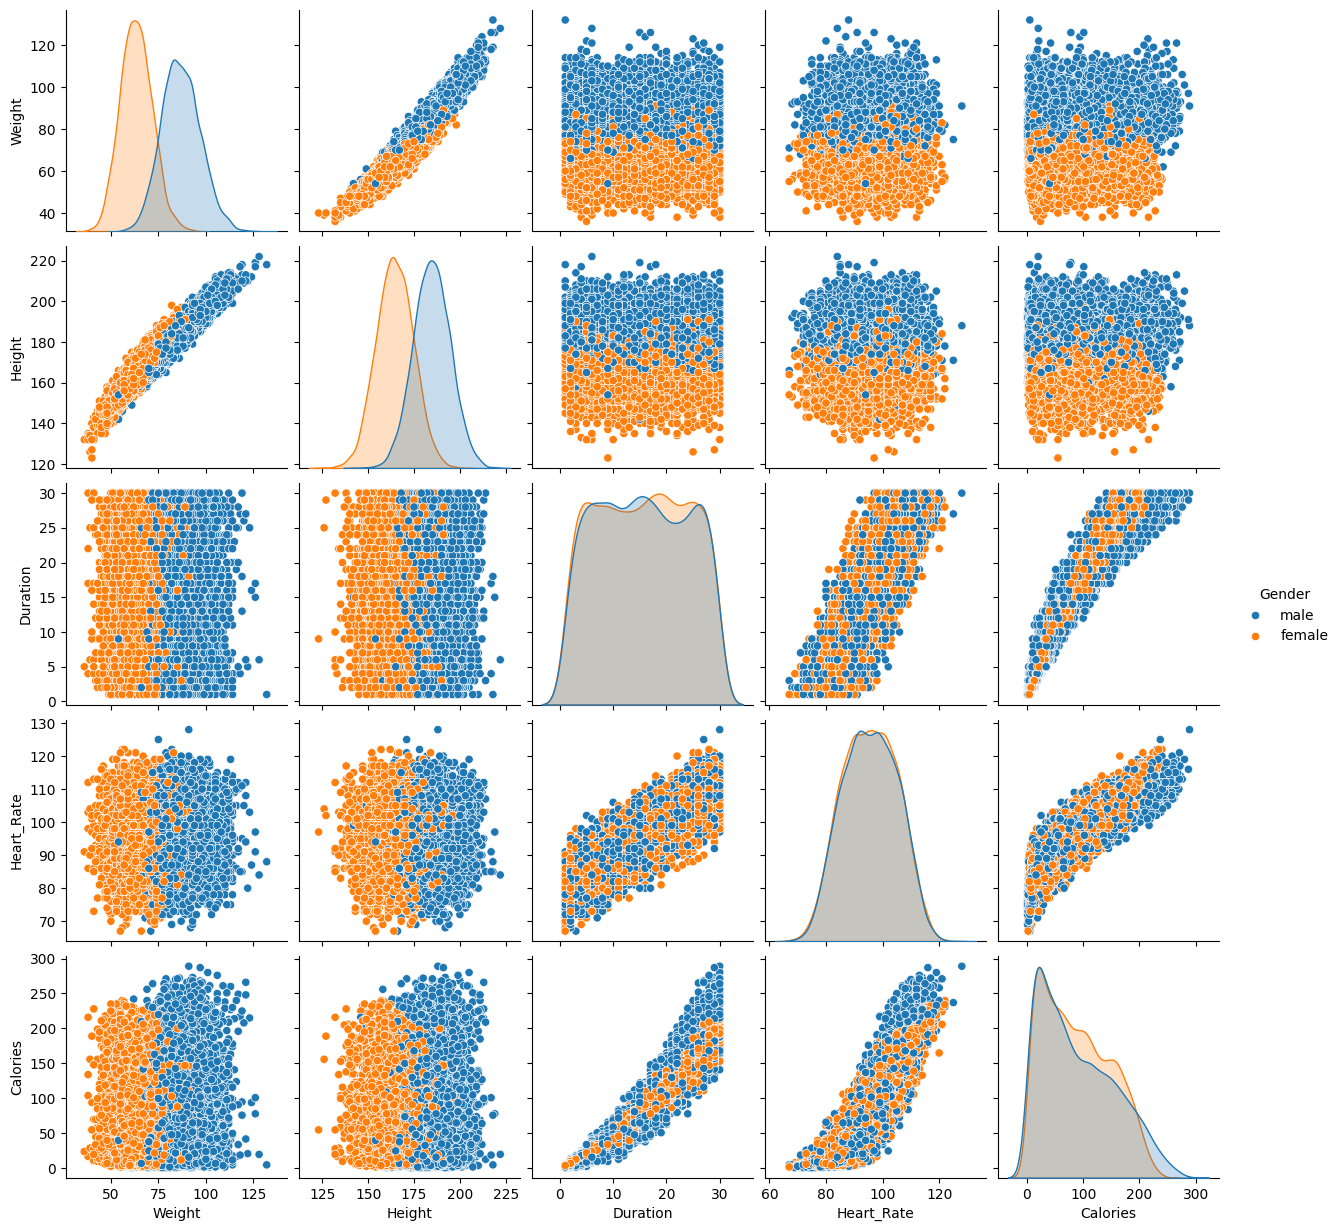

In [20]:
sn.pairplot(exercise_train_data[["Weight","Height","Duration","Heart_Rate","Calories","Gender"]],hue="Gender")

In [ ]:
print("Minimum age in dataset is: ",exercise_train_data["Age"].min())
print("Maximum age in dataset is: ",exercise_train_data["Age"].max())


Minimum age in dataset is:  20
Minimum age in dataset is:  79


In [22]:
age_groups=["Young","Middle-Aged","Old"]
exercise_train_data["age_groups"]=pd.cut(exercise_train_data["Age"],bins=[20,40,60,80],right=False,labels=age_groups)
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [23]:
exercise_train_data["age_groups"].value_counts()

age_groups
Young          6029
Middle-Aged    3535
Old            2436
Name: count, dtype: int64

<Axes: xlabel='age_groups', ylabel='count'>

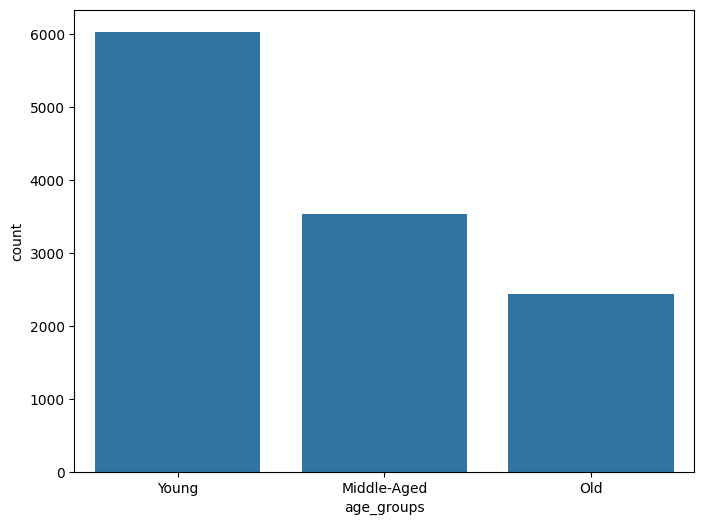

In [24]:
plt.rcParams["figure.figsize"]=8,6
sn.countplot(data=exercise_train_data,x="age_groups")

In [25]:
import nbformat
print(nbformat.__version__)
fig=px.box(exercise_train_data,x="age_groups",y="Calories",color="Gender")

fig.update_layout(
    width=700,
    height=450,
)
fig.show()

4.2.0


In [26]:
print("Dataset's median excercise duration in mins: ",exercise_train_data["Duration"].median())
print("Dataset's median excercise duration in mins: ",exercise_train_data["Duration"].mean())


Dataset's median excercise duration in mins:  16.0
Dataset's median excercise duration in mins:  15.520083333333334


<Axes: xlabel='Gender', ylabel='count'>

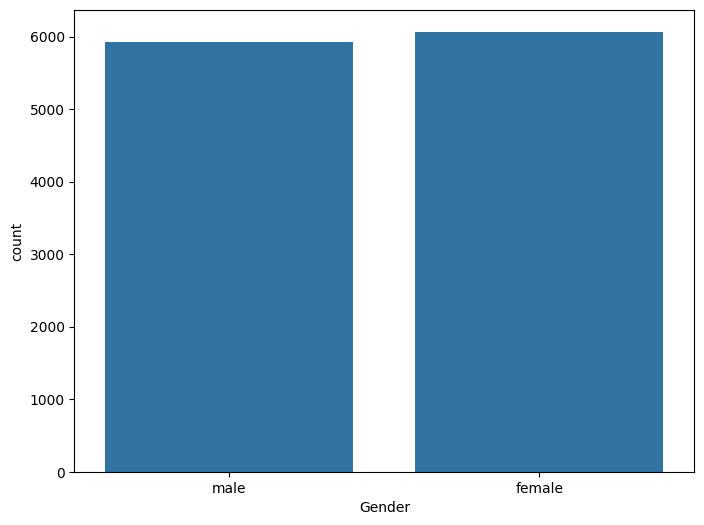

In [27]:
plt.rcParams["figure.figsize"]=8,6
sn.countplot(data=exercise_train_data,x="Gender")

In [28]:
fig=px.box(exercise_train_data,x="Gender",y="Duration")
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

In [29]:
for data in [exercise_train_data,exercise_test_data]:
    data["BMI"]=data["Weight"] / ((data["Height"]/100)**2)
    data["BMI"]=round(data["BMI"],2)

In [31]:
bmi_category=["Very severly underweight","Severely underweight",
              "Underweight","Normal",
              "Overweight","Obese Class I",
              "Obese Class II","Obese Class III"]
exercise_train_data["Categorized_BMI"]=pd.cut(exercise_train_data["BMI"],bins=[0,15,16,18.5,25,30,35,40,50]
                                              ,right=False,labels=bmi_category)
exercise_train_data["Categorized_BMI"]=exercise_train_data["Categorized_BMI"].astype("object")
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99,Normal


In [32]:
ds=exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns=["Categorized_BMI","Count"]
ds

,Categorized_BMI,Count
0,Normal,7819
1,Overweight,4181


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

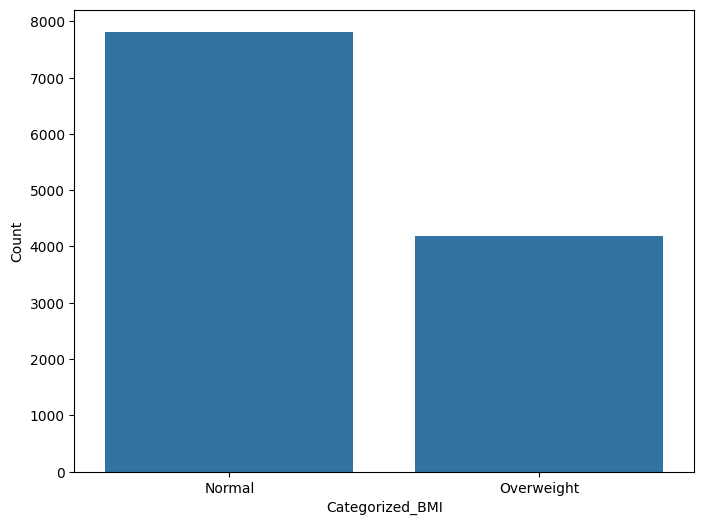

In [34]:
ds=ds[(ds["Categorized_BMI"]=="Normal") | (ds["Categorized_BMI"]=="Overweight")]
plt.rcParams["figure.figsize"]=8,6
sn.barplot(data=ds,x="Categorized_BMI",y="Count")

In [36]:
ds=exercise_train_data[["Gender","Categorized_BMI"]].value_counts().reset_index().sort_values(by=["Gender","Categorized_BMI"])
ds.columns=["Gender","Categorized_BMI","Count"]
ds

,Gender,Categorized_BMI,Count
0,female,Normal,5572
3,female,Overweight,496
2,male,Normal,2247
1,male,Overweight,3685


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

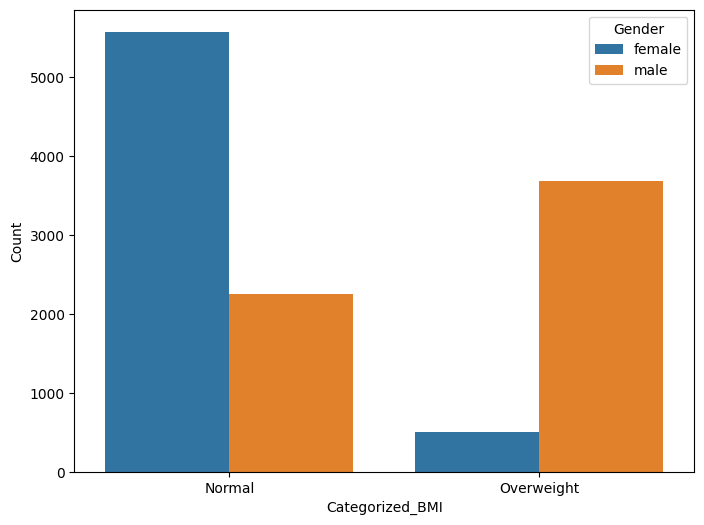

In [37]:
plt.rcParams["figure.figsize"]=8,6
sn.barplot(data=ds,x="Categorized_BMI",y="Count",hue="Gender")

In [38]:
ds=exercise_train_data[["age_groups","Categorized_BMI"]].value_counts().reset_index().sort_values(by=["age_groups","Categorized_BMI"])
ds.columns=["age_groups","Categorized_BMI","Count"]
ds

,age_groups,Categorized_BMI,Count
0,Young,Normal,4369
2,Young,Overweight,1660
1,Middle-Aged,Normal,2197
3,Middle-Aged,Overweight,1338
4,Old,Normal,1253
5,Old,Overweight,1183


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

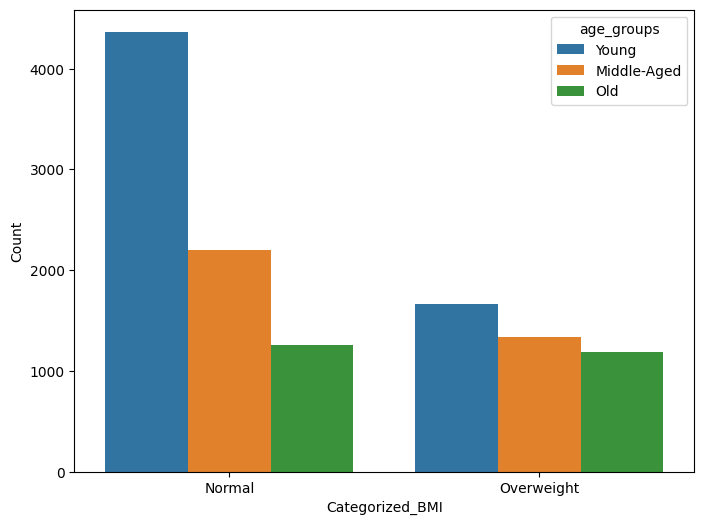

In [39]:
plt.rcParams["figure.figsize"]=8,6
sn.barplot(data=ds,x="Categorized_BMI",y="Count",hue="age_groups")

In [40]:
fig=px.scatter(exercise_train_data,x="Duration",y="Body_Temp",size="Calories")
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

Pearson Corelation

Age                   int64
Height              float64
Weight              float64
Duration            float64
Heart_Rate          float64
Body_Temp           float64
Calories            float64
age_groups         category
BMI                 float64
Categorized_BMI      object
Gender_male            bool
dtype: object


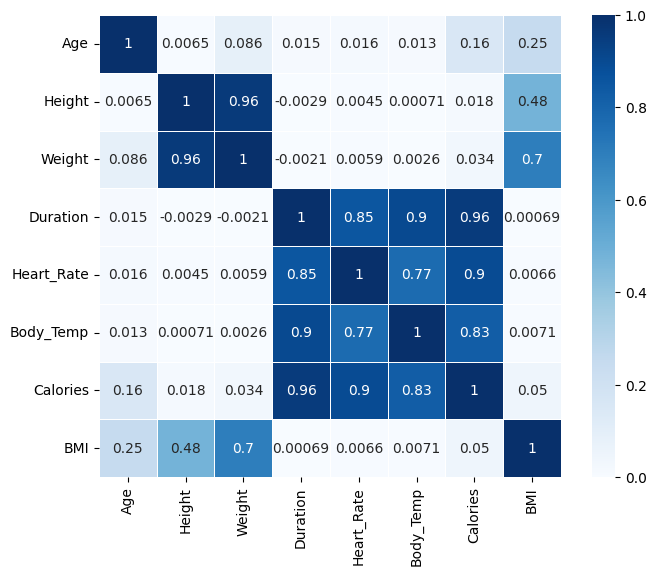

In [55]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming exercise_train_data is your DataFrame
# Check data types
print(exercise_train_data.dtypes)

# Convert categorical columns to numeric (if needed)


# Select only numeric columns for correlation
exercise_train_data_numeric = exercise_train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = exercise_train_data_numeric.corr()

# Plot the heatmap
plt.rcParams["figure.figsize"] = (8, 6)
sn.heatmap(corr, annot=True, square=True, linewidth=.5, vmin=0, vmax=1, cmap='Blues')
plt.show()



In [56]:

exercise_train_data=pd.get_dummies(exercise_train_data,drop_first=True)
exercise_test_data=pd.get_dummies(exercise_test_data,drop_first=True)

In [61]:
x_train=exercise_train_data.drop("Calories",axis=1)
y_train=exercise_train_data["Calories"]

x_test=exercise_test_data.drop("Calories",axis=1)
y_test=exercise_test_data["Calories"]



In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 11)
(3000, 8)
(12000,)
(3000,)


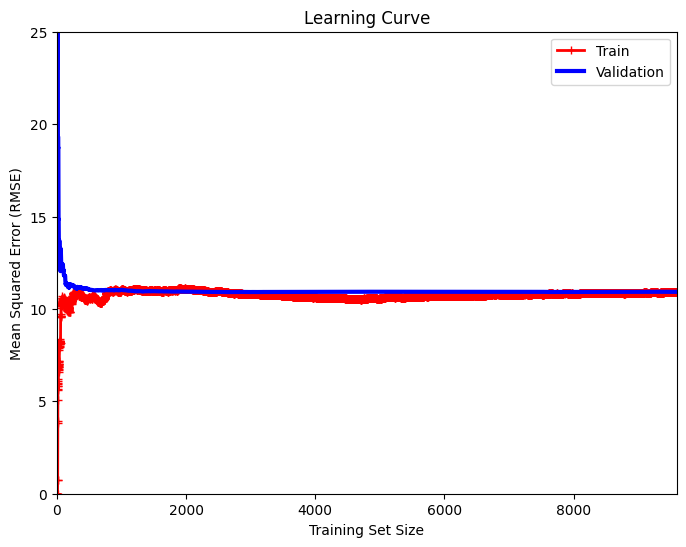

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'exercise_train_data'
# Define your features (X) and target (y)
X = exercise_train_data.drop("Calories", axis=1)  # Replace "Calories" with your target variable
y = exercise_train_data["Calories"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to dummy variables (one-hot encoding)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize lists to store errors
train_errors, val_errors = [], []

def plot_learning_curve(model):
    for m in range(1, len(X_train) + 1):  # Use the length of X_train
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)  # Predict on the entire test set
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

# Create a Linear Regression model
linreg = LinearRegression()

# Plot the learning curve
plot_learning_curve(linreg)

# Plotting the results
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (RMSE)")
plt.xlim([0, len(X_train)])  # Adjust x-axis limit to the size of the training set
plt.ylim([0, 25])  # Adjust y-axis limit as needed
plt.legend()
plt.show()

In [ ]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_prediction = linreg.predict(X_test)

In [72]:
print("Linear Regression Mean Absolute Error(MAE) : ", round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : ", round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  7.98
Linear Regression Mean Squared Error(MSE) :  119.31
Linear Regression Root Mean Squared Error(RMSE) :  10.92


In [73]:
forest_reg = RandomForestRegressor()
param_grid = {'n_estimators' : [10, 100, 1000] ,
'max_features' : [2,2,3],
'max_depth' : [2, 4, 6]}

grid_search = GridSearchCV(forest_reg, param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , n_jobs = -1 , verbose = 3)
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [74]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)

In [76]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [77]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : ", round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  6.23
RandomForest Mean Squared Error(MSE) :  82.71
RandomForest Root Mean Squared Error(RMSE) :  9.09


In [78]:
exercise_train_data.iloc[32]

Age                              23
Height                        187.0
Weight                         87.0
Duration                       27.0
Heart_Rate                    102.0
Body_Temp                      40.3
Calories                      140.0
BMI                           24.88
Gender_male                    True
age_groups_Middle-Aged        False
age_groups_Old                False
Categorized_BMI_Overweight    False
Name: 5897, dtype: object